In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.4 MB/s 
     |████████████████████████████████| 210 kB 41.0 MB/s 
     |████████████████████████████████| 81 kB 7.4 MB/s 
     |████████████████████████████████| 78 kB 6.7 MB/s 
     |████████████████████████████████| 150 kB 53.7 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 113 kB 53.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=7e96a6f6314afe15cff02f745712aa75592289ecc14cf671083b8f67f1e576c0
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 4.4 MB/s 


In [ ]:
import pandas as pd
import numpy as np

import copy
import pickle
from datetime import datetime

import xgboost as xgb
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import median_absolute_error as MAPE
from sklearn.metrics import r2_score  as R2
from xgboost import plot_importance
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

from sklearn.metrics import r2_score

# Parameter tunning
import optuna

from sklearn.model_selection import KFold

import shap


from google.colab import drive

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

Version: 1

Data description:
- 1127 postcodes
- Google POI + EPC statistics + Property Data

Goal: sale price

https://machinelearningmastery.com/xgboost-for-regression/
https://xgboost.readthedocs.io/en/stable/parameter.html


In [ ]:
# Execute this cell paste the Key, and press the key ENTER...
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
Data = pd.read_csv('/content/drive/My Drive/UKBenEstate/datasetV6.csv') 

In [ ]:
list(Data.columns)

['Unnamed: 0',
 'postcode',
 'synagogue_rating_mean_1500',
 'synagogue_rating_std_1500',
 'synagogue_count_1500',
 'synagogue_rating_mean_1000',
 'synagogue_rating_std_1000',
 'synagogue_count_1000',
 'synagogue_rating_mean_500',
 'synagogue_rating_std_500',
 'synagogue_count_500',
 'synagogue_min',
 'shopping_mall_rating_mean_1500',
 'shopping_mall_rating_std_1500',
 'shopping_mall_count_1500',
 'shopping_mall_rating_mean_1000',
 'shopping_mall_rating_std_1000',
 'shopping_mall_count_1000',
 'shopping_mall_rating_mean_500',
 'shopping_mall_rating_std_500',
 'shopping_mall_count_500',
 'shopping_mall_min',
 'secondary_rating_mean_1500',
 'secondary_rating_std_1500',
 'secondary_count_1500',
 'secondary_rating_mean_1000',
 'secondary_rating_std_1000',
 'secondary_count_1000',
 'secondary_rating_mean_500',
 'secondary_rating_std_500',
 'secondary_count_500',
 'secondary_min',
 'school_rating_mean_1500',
 'school_rating_std_1500',
 'school_count_1500',
 'school_rating_mean_1000',
 'school

### Crime

In [ ]:
Data['crime_total']=Data['PublicOrder']+Data['Burglary']+Data['Robbery']+Data['PossessionOfWeapons']+Data['BicycleTheft']+Data['AntiSocialBehaviour']+Data['Violence']+Data['Theft']+Data['Shoplifting']+Data['OtherCrime']+Data['Drugs']+Data['OtherTheft']+Data['VehicleCrime']+Data['CriminalDamage']

In [ ]:
Data['PublicOrder']=Data['PublicOrder']/Data['crime_total']

In [ ]:
Data['Burglary'] = Data['Burglary']/Data['crime_total']
Data['Robbery'] = Data['Robbery']/Data['crime_total']
Data['PossessionOfWeapons'] = Data['PossessionOfWeapons']/Data['crime_total']
Data['BicycleTheft'] = Data['BicycleTheft']/Data['crime_total']
Data['AntiSocialBehaviour'] = Data['AntiSocialBehaviour']/Data['crime_total']
Data['Violence'] = Data['Violence']/Data['crime_total']
Data['Theft'] = Data['Theft']/Data['crime_total']
Data['Shoplifting'] = Data['Shoplifting']/Data['crime_total']
Data['OtherCrime'] = Data['OtherCrime']/Data['crime_total']
Data['Drugs'] = Data['Drugs']/Data['crime_total']
Data['OtherTheft'] = Data['OtherTheft']/Data['crime_total']
Data['VehicleCrime'] = Data['VehicleCrime']/Data['crime_total']
Data['CriminalDamage'] = Data['CriminalDamage']/Data['crime_total']

Data['crime_Type_A'] = Data['Robbery']+Data['Drugs']+Data['PossessionOfWeapons']+Data['Burglary']+Data['OtherCrime']
Data['crime_Type_B'] = Data['OtherTheft'] + Data['Shoplifting'] + Data['Theft'] + Data['BicycleTheft']
Data['crime_Type_C'] = Data['CriminalDamage']+ Data['Violence'] + Data['AntiSocialBehaviour']
Data['crime_Type_D'] = Data['VehicleCrime']

In [ ]:
dropList=['Burglary',
 'Robbery',
 'PossessionOfWeapons',
 'BicycleTheft',
 'AntiSocialBehaviour',
 'Violence',
 'Theft',
 'Shoplifting',
 'OtherCrime',
 'Drugs',
 'OtherTheft',
 'VehicleCrime',
 'CriminalDamage',]
Data.drop(dropList, axis = 1, inplace = True)

### Age 

error: age55_59 age65-69

In [ ]:
Data['TotalModPop'] = Data['age20_24']+Data['age25_29']+Data['age30_34']+Data['age35_39']+Data['age40_44']+Data['age45_49']+Data['age45_49']+Data['age50_54']+Data['age60_64']
Data['age20_29'] = Data['age20_24']+Data['age25_29']
Data['age30_64'] = Data['age30_34']+Data['age35_39']+Data['age40_44']+Data['age45_49']+Data['age50_54']+Data['age60_64']
Data['age65_'] = Data['age70_74']+Data['age75_79']+Data['age80_84']+Data['age85_89']

In [ ]:
dropList=['age20_24',
 'age25_29',
 'age30_34',
 'age35_39',
 'age40_44',
 'age45_49',
 'age50_54',
 'age60_64',
 'age70_74',
 'age75_79',
 'age80_84',
 'age85_89']
Data.drop(dropList, axis = 1, inplace = True)

In [ ]:
Data['commute_method_public'] = Data['commute_method_train'] + Data['commute_method_bus'] + Data['commute_method_underground_light_rail']
Data['commute_method_private'] = Data['commute_method_motorcycle'] + Data['commute_method_taxi'] + Data['commute_method_car_driver'] + Data['commute_method_car_passenger']
Data['commute_method_open'] = Data['commute_method_foot']+Data['commute_method_bicycle']

In [ ]:
dropList=['commute_method_foot',
 'commute_method_bicycle',
 'commute_method_other',
 'commute_method_motorcycle',
 'commute_method_taxi',
 'commute_method_train',
 'commute_method_bus',
 'commute_method_underground_light_rail',
 'commute_method_car_driver',
 'commute_method_at_home',
 'commute_method_car_passenger',
]
Data.drop(dropList, axis = 1, inplace = True)

In [ ]:
#Data['sold_70pc_disp']=-(Data['sold_70pc_rangeMIN']-Data['sold_70pc_rangeMAX'])/Data['sold_average']
#Data['sold_80pc_disp']=-(Data['sold_80pc_rangeMIN']-Data['sold_80pc_rangeMAX'])/Data['sold_average']
#Data['sold_90pc_disp']=-(Data['sold_90pc_rangeMIN']-Data['sold_90pc_rangeMAX'])/Data['sold_average']
#Data['sold_100pc_disp']=-(Data['sold_100pc_rangeMIN']-Data['sold_100pc_rangeMAX'])/Data['sold_average']

In [ ]:
#Data['sold_sqf_70pc_disp'] =-(Data['sold_sqf_70pc_rangeMIN']-Data['sold_sqf_70pc_rangeMAX'])/Data['sold_sqf_average']
#Data['sold_sqf_80pc_disp'] =-(Data['sold_sqf_80pc_rangeMIN']-Data['sold_sqf_80pc_rangeMAX'])/Data['sold_sqf_average']
#Data['sold_sqf_90pc_disp'] =-(Data['sold_sqf_90pc_rangeMIN']-Data['sold_sqf_90pc_rangeMAX'])/Data['sold_sqf_average']
#Data['sold_sqf_100pc_disp'] =-(Data['sold_sqf_100pc_rangeMIN']-Data['sold_sqf_100pc_rangeMAX'])/Data['sold_sqf_average']

In [ ]:
#Data['rents_70pc_disp'] = -(Data['rents_70pc_rangeMIN']-Data['rents_70pc_rangeMAX'])/Data['rents_average']
#Data['rents_80pc_disp'] =-(Data['rents_80pc_rangeMIN']-Data['rents_80pc_rangeMAX'])/Data['rents_average']
#Data['rents_90pc_disp'] =-(Data['rents_90pc_rangeMIN']-Data['rents_90pc_rangeMAX'])/Data['rents_average']
#Data['rents_100pc_disp'] =-(Data['rents_100pc_rangeMIN']-Data['rents_100pc_rangeMAX'])/Data['rents_average']

In [ ]:
dropList=[ 'dyn_sold_points_analysed',
 'dyn_sold_70pc_rangeMIN',
 'dyn_sold_70pc_rangeMAX',
 'dyn_sold_80pc_rangeMIN',
 'dyn_sold_80pc_rangeMAX',
 'dyn_sold_90pc_rangeMIN',
 'dyn_sold_90pc_rangeMAX',
 'dyn_sold_sqf_points_analysed',
 'dyn_sold_sqf_70pc_rangeMIN',
 'dyn_sold_sqf_70pc_rangeMAX',
 'dyn_sold_sqf_80pc_rangeMIN',
 'dyn_sold_sqf_80pc_rangeMAX',
 'dyn_sold_sqf_90pc_rangeMIN',
 'dyn_sold_sqf_90pc_rangeMAX',
 'dyn_rents_points_analysed',
 'dyn_rents_70pc_rangeMIN',
 'dyn_rents_70pc_rangeMAX',
 'dyn_rents_80pc_rangeMIN',
 'dyn_rents_80pc_rangeMAX',
 'dyn_rents_90pc_rangeMIN',
 'dyn_rents_90pc_rangeMAX',]
Data.drop(dropList, axis = 1, inplace = True)

In [ ]:
### POI 


In [ ]:
Data['HperP']=Data['Households']/Data['Population']

In [ ]:
#Data['construction_before_1950']=(Data['construction_before_1900'] + Data['construction_1900_1929'] + Data['construction_1930_1949']) 
#Data['construction_1950_1975']=(Data['construction_1950_1966']+Data['construction_1967_1975']+ Data['construction_1976_1982'])
#Data['construction_1983_1990']=(Data['construction_1983_1990']+Data['construction_1991_1995'])
#Data['construction_1996_2006']=(Data['construction_1996_2002']+Data['construction_2003_2006'])
#Data['construction_2007_onwards']=(Data['construction_2007_2011']+Data['construction_2012_onwards'])

In [ ]:
dropList=['construction_before_1900',
 'construction_1900_1929',
 'construction_1930_1949',
 'construction_1950_1966',
 'construction_1967_1975',
 'construction_1976_1982',
 'construction_1983_1990',
 'construction_1991_1995',
 'construction_1996_2002',
 'construction_2003_2006',
 'construction_2007_2011',
 'construction_2012_onwards']
#Data.drop(dropList, axis = 1, inplace = True)

No handles with labels found to put in legend.


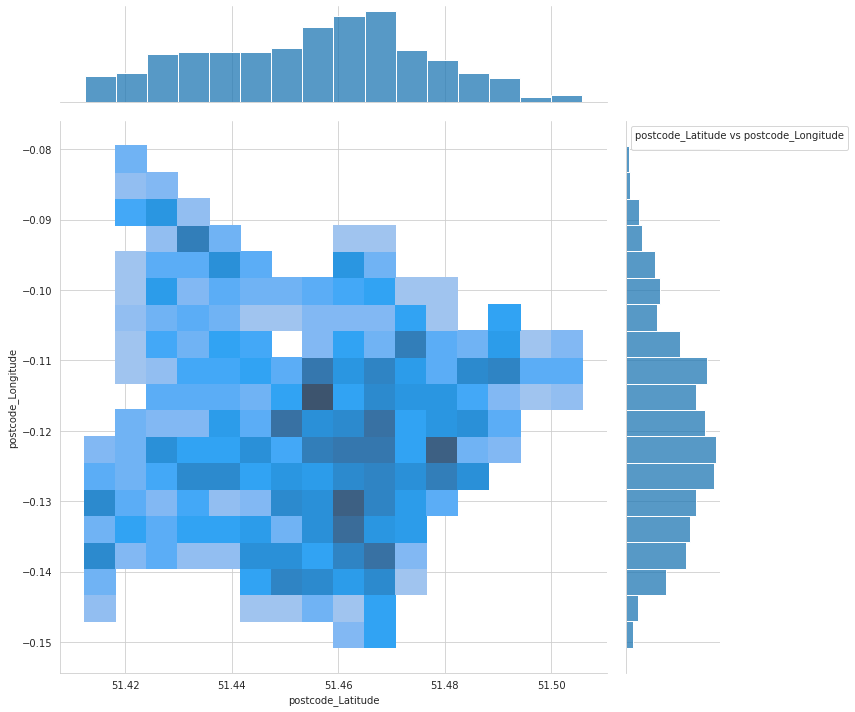

In [ ]:
sns.set_style('whitegrid')
sns.jointplot(x ='postcode_Latitude', y ='postcode_Longitude', data = Data, kind ='hist',height=10)
plt.legend(title='postcode_Latitude vs postcode_Longitude')

No handles with labels found to put in legend.


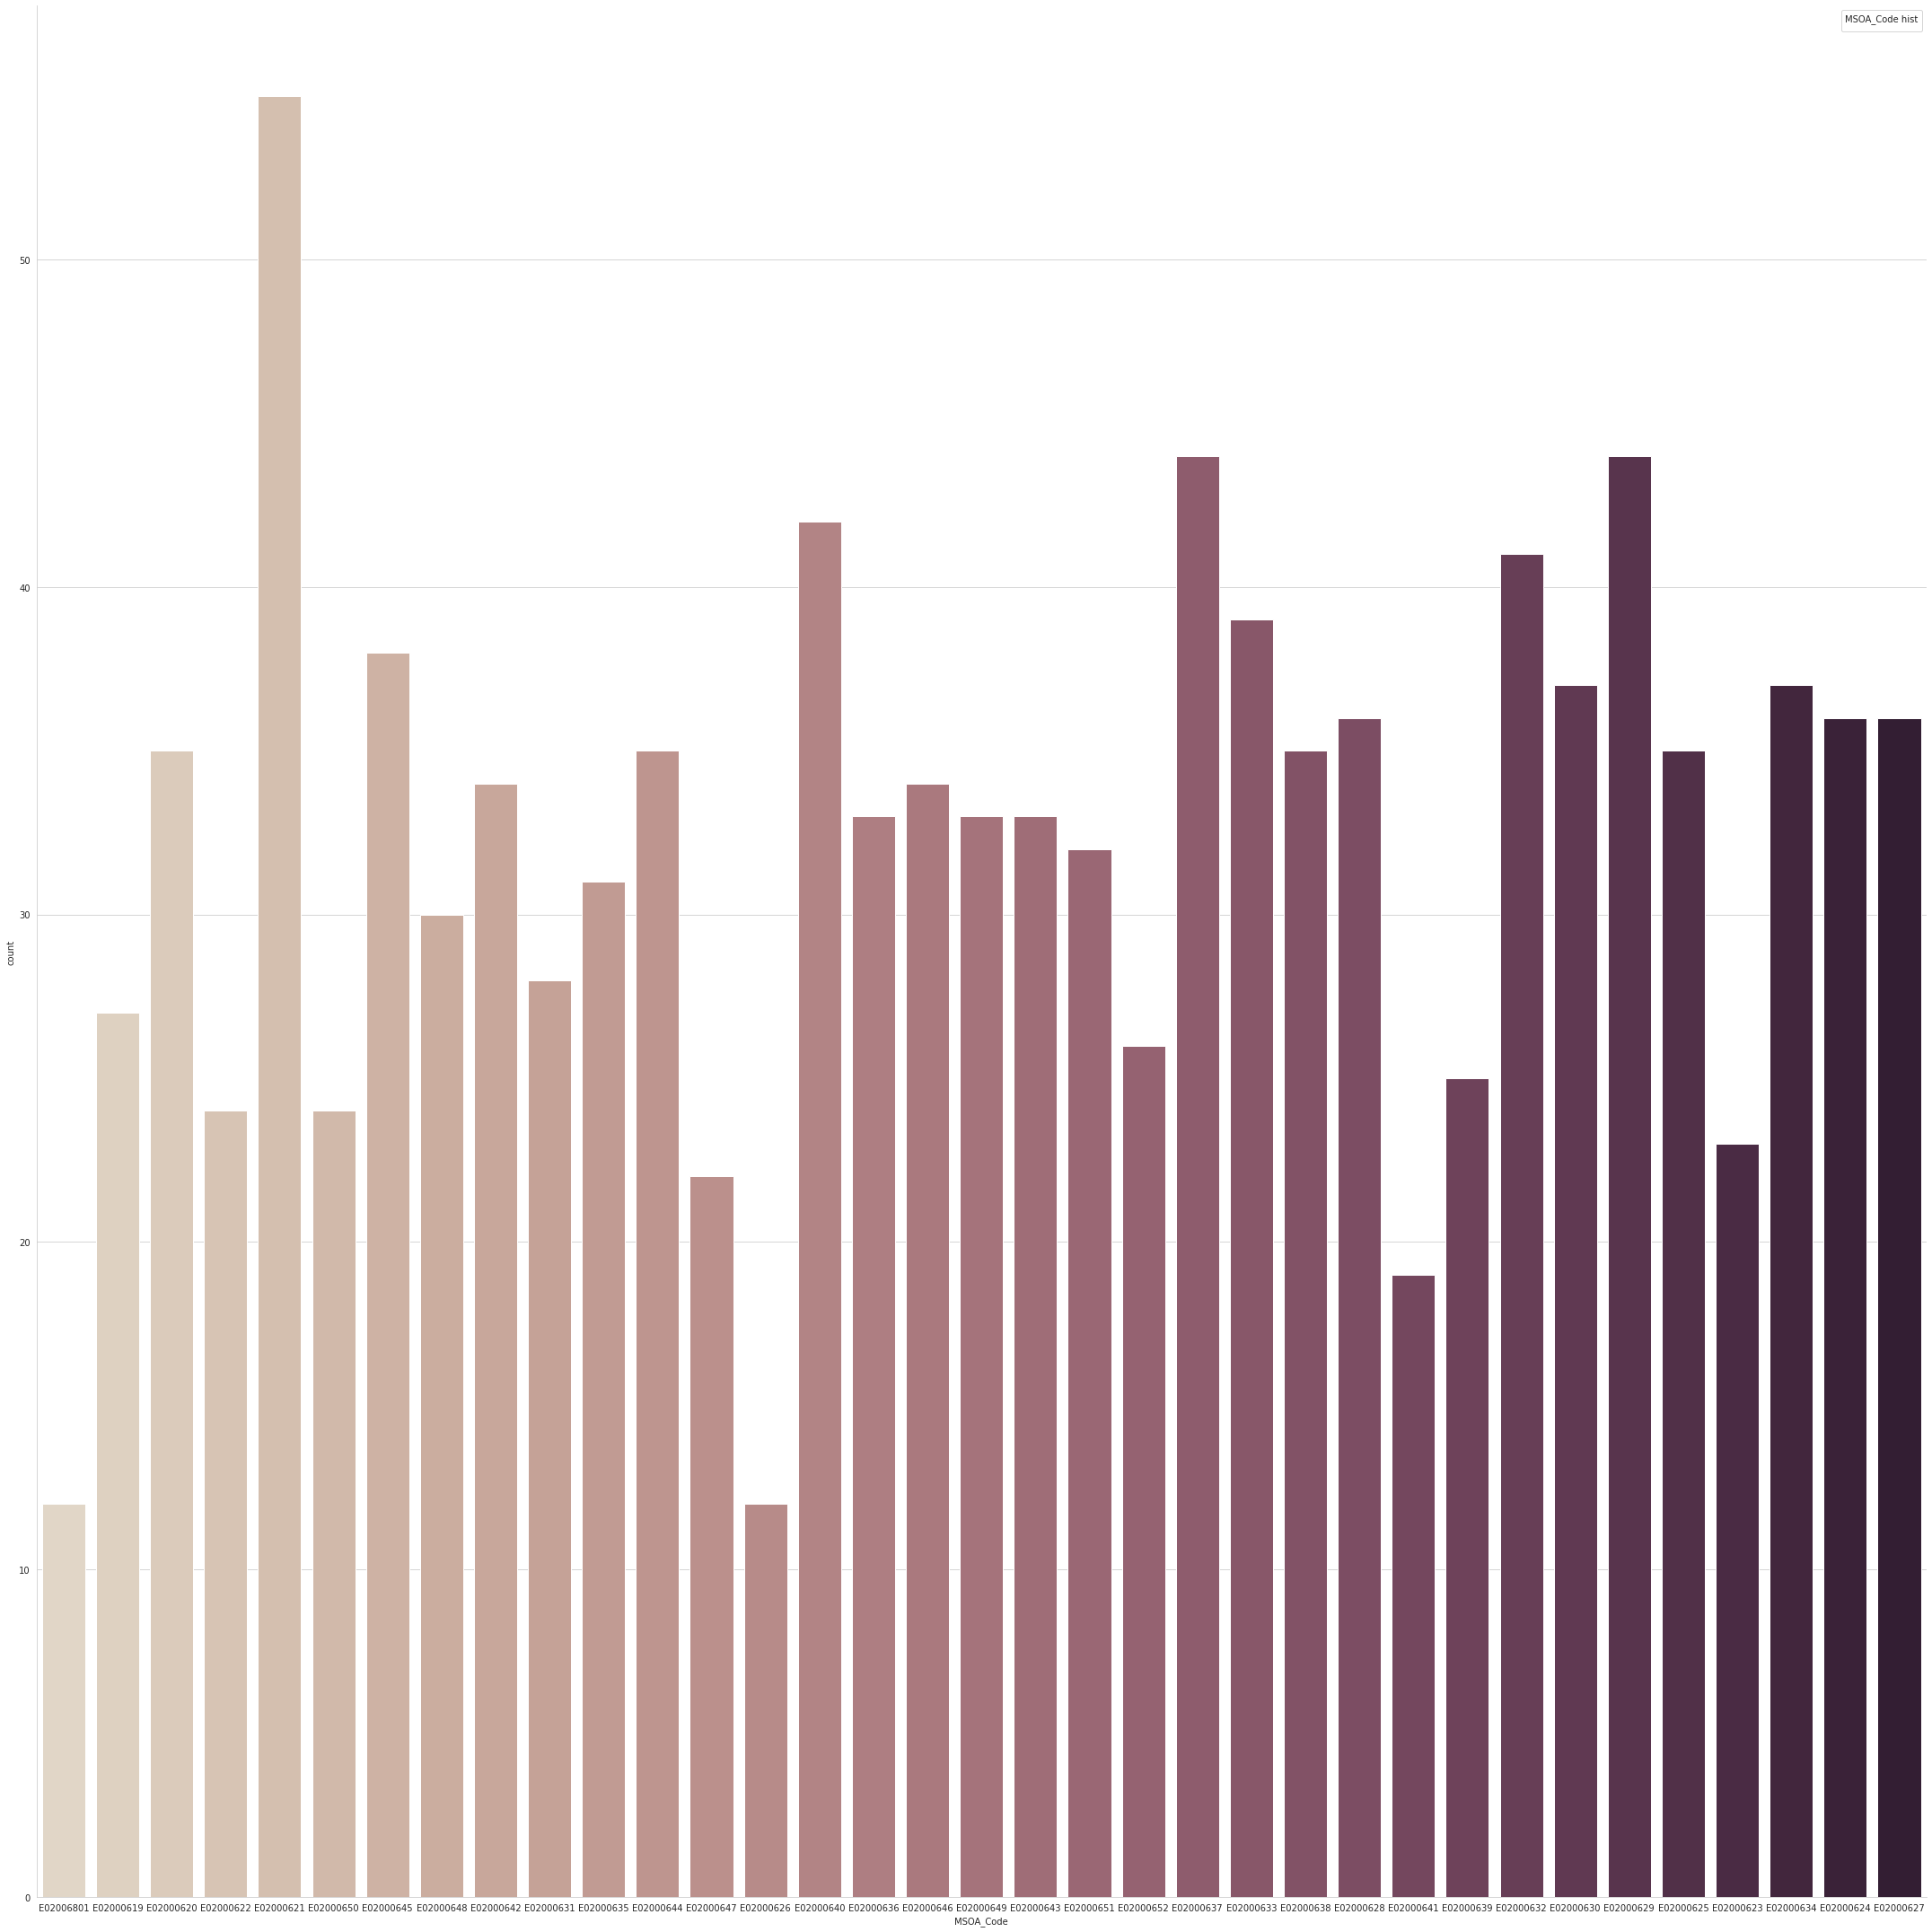

In [ ]:
sns.set_style('whitegrid')
sns.catplot(x="MSOA_Code", kind="count", palette="ch:.25", data=Data, height=30)
plt.legend(title='MSOA_Code hist')

No handles with labels found to put in legend.


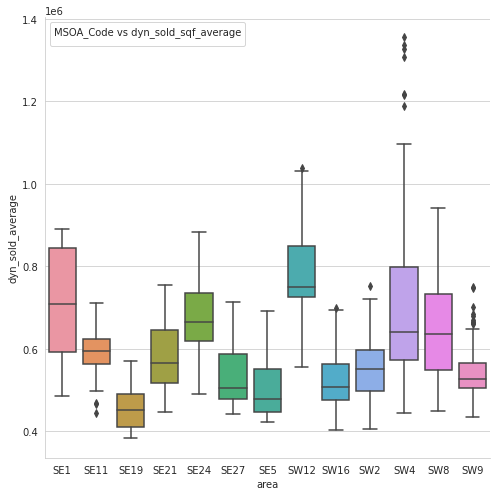

In [ ]:
sns.catplot(x="area", y="dyn_sold_average",  kind="box", data=Data,height=7)
plt.legend(title='MSOA_Code vs dyn_sold_sqf_average')

No handles with labels found to put in legend.


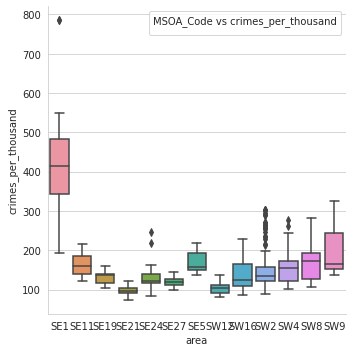

In [ ]:
sns.catplot(x="area", y="crimes_per_thousand",  kind="box", data=Data)
plt.legend(title='MSOA_Code vs crimes_per_thousand')

Removing inrelevant attributes

In [ ]:
list(Data.columns)

['Unnamed: 0',
 'postcode',
 'synagogue_rating_mean_1500',
 'synagogue_rating_std_1500',
 'synagogue_count_1500',
 'synagogue_rating_mean_1000',
 'synagogue_rating_std_1000',
 'synagogue_count_1000',
 'synagogue_rating_mean_500',
 'synagogue_rating_std_500',
 'synagogue_count_500',
 'synagogue_min',
 'shopping_mall_rating_mean_1500',
 'shopping_mall_rating_std_1500',
 'shopping_mall_count_1500',
 'shopping_mall_rating_mean_1000',
 'shopping_mall_rating_std_1000',
 'shopping_mall_count_1000',
 'shopping_mall_rating_mean_500',
 'shopping_mall_rating_std_500',
 'shopping_mall_count_500',
 'shopping_mall_min',
 'secondary_rating_mean_1500',
 'secondary_rating_std_1500',
 'secondary_count_1500',
 'secondary_rating_mean_1000',
 'secondary_rating_std_1000',
 'secondary_count_1000',
 'secondary_rating_mean_500',
 'secondary_rating_std_500',
 'secondary_count_500',
 'secondary_min',
 'school_rating_mean_1500',
 'school_rating_std_1500',
 'school_count_1500',
 'school_rating_mean_1000',
 'school

In [ ]:
dropList=['Unnamed: 0','postcode','count',
         'postcode_Latitude','postcode_Longitude','MSOA_Code','LSOA_Code','area'
          ]
Data.drop(dropList, axis = 1, inplace = True)

In [ ]:
dropList=['dyn_sold_sqf_average',
 'dyn_sold_100pc_rangeMIN',
 'dyn_sold_100pc_rangeMAX',
 'dyn_sold_sqf_100pc_rangeMIN',
 'dyn_sold_sqf_100pc_rangeMAX',
 'dyn_rents_average',
 'dyn_rents_100pc_rangeMIN',
 'dyn_rents_100pc_rangeMAX',
         ]
Data.drop(dropList, axis = 1, inplace = True)

Adding the price paid by sq

No handles with labels found to put in legend.


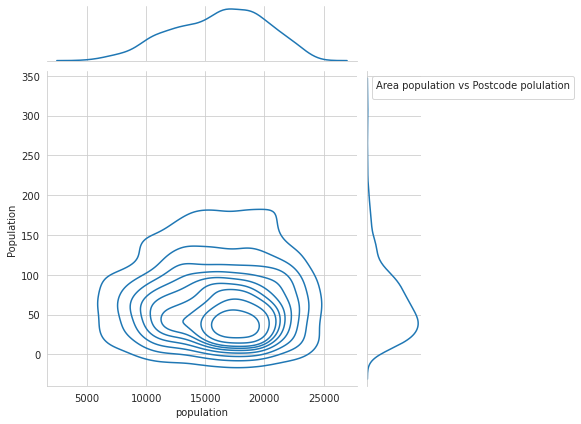

In [ ]:
sns.set_style('whitegrid')
sns.jointplot(x ='population', y ='Population', data = Data, kind ='kde')
plt.legend(title='Area population vs Postcode polulation')

No handles with labels found to put in legend.


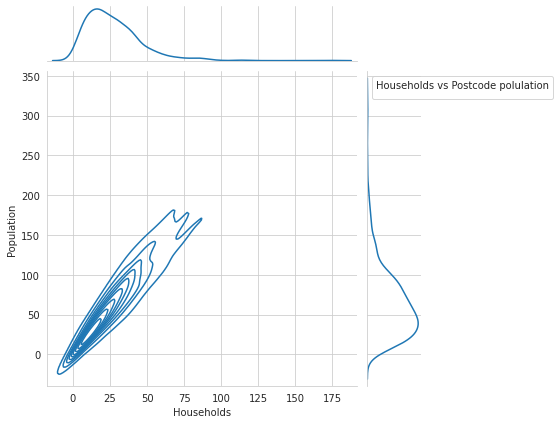

In [ ]:
sns.set_style('whitegrid')
sns.jointplot(x ='Households', y ='Population', data = Data, kind ='kde')
plt.legend(title='Households vs Postcode polulation')

 sq_PricePaid statistics

In [ ]:
Data['dyn_sold_average'].describe()

count    1.127000e+03
mean     5.939672e+05
std      1.304753e+05
min      3.840580e+05
25%      5.072495e+05
50%      5.652790e+05
75%      6.440960e+05
max      1.355327e+06
Name: dyn_sold_average, dtype: float64

No handles with labels found to put in legend.


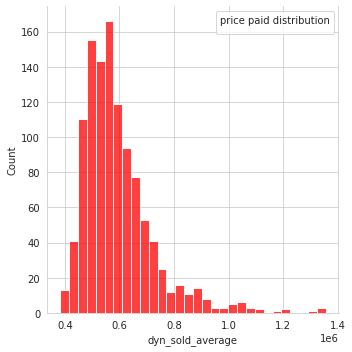

In [ ]:
sns.set_style('whitegrid')
sns.displot(Data['dyn_sold_average'], kde = False, color ='red', bins = 30)
plt.legend(title='price paid distribution')

No handles with labels found to put in legend.


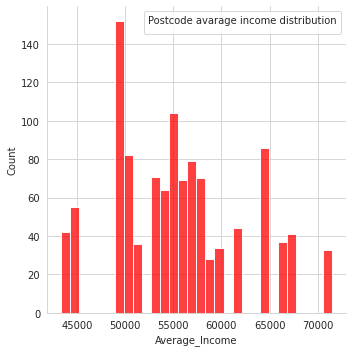

In [ ]:
sns.set_style('whitegrid')
sns.displot(Data['Average_Income'], kde = False, color ='red', bins = 30)
plt.legend(title='Postcode avarage income distribution')

No handles with labels found to put in legend.


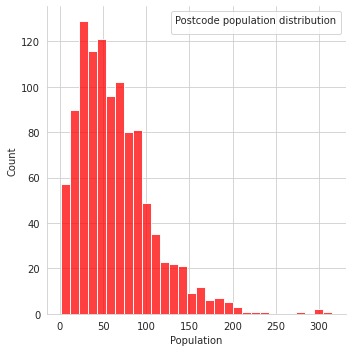

In [ ]:
sns.set_style('whitegrid')
sns.displot(Data['Population'], kde = False, color ='red', bins = 30)
plt.legend(title='Postcode population distribution')

No handles with labels found to put in legend.


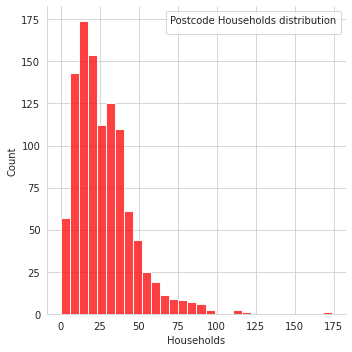

In [ ]:
sns.set_style('whitegrid')
sns.displot(Data['Households'], kde = False, color ='red', bins = 30)
plt.legend(title='Postcode Households distribution')

No handles with labels found to put in legend.


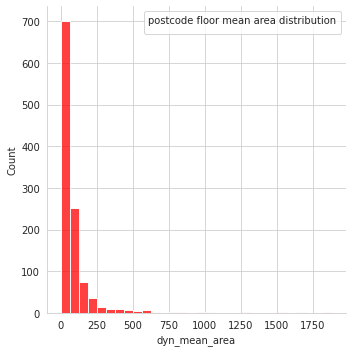

In [ ]:
sns.set_style('whitegrid')
sns.displot(Data['dyn_mean_area'], kde = False, color ='red', bins = 30)
plt.legend(title='postcode floor mean area distribution')

### Categorical attribute binarization

In [ ]:


catData = ['dyn_ptal', 'dyn_flood_risk','crime_rating']
for att in catData:
    unique_classes = Data[att].unique()
    one_hot = pd.get_dummies(unique_classes, prefix=att,dummy_na=True, columns = [att])
    one_hot[att] = unique_classes
    Data = Data.merge(one_hot, on = [att], how='left')
    Data = Data.drop(columns = [att])

### Define sq_price as the model goal 

In [ ]:
Data['price'] = Data['dyn_sold_average']
Data.drop(['dyn_sold_average'], axis = 1, inplace = True)

In [ ]:
# Split data
X, y = Data.iloc[:, :-1], Data.iloc[:, -1]

### Model tunning

In [ ]:
def objective(trial, X, y, kf):
    n_estimators = trial.suggest_int('n_estimators', 206, 512)
    learning_rate =trial.suggest_uniform('learning_rate', 0, 0.1) 
    #max_depth = trial.suggest_int('max_depth', 3, 10)
    min_split_loss = trial.suggest_uniform('min_split_loss', 0, 2.5)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    reg_lambda = trial.suggest_uniform('reg_lambda', 0, 10)
    reg_alpha = trial.suggest_uniform('reg_alpha', 0, 10)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1)
    subsample = trial.suggest_uniform('subsample', 0.5, 1)
    eta = trial.suggest_uniform('eta', 0, 1)
    
    model = xg.XGBRegressor(n_estimators=n_estimators,
                          #max_depth=max_depth,
                          learning_rate=learning_rate,
                          min_split_loss=min_split_loss,
                          min_child_weight=min_child_weight,
                          reg_lambda=reg_lambda,
                          reg_alpha=reg_alpha,
                          colsample_bytree=colsample_bytree,
                          subsample=subsample,
                          eta=eta,
                          objective='reg:squarederror', 
                          booster='gbtree',
                          seed=42,
                          n_jobs=3)
    
    
    test_score = []
    
    step = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        test_score.append(MAE(y_test, y_pred)/75.939672e+05*100)
        #test_score.append(R2(y_test, y_pred))
        
        trial.report(np.mean(test_score), step)
        
        if trial.should_prune():
            raise optuna.TrialPruned()
            
        step+=1

    return np.mean(test_score)



kf = KFold(n_splits=4, shuffle=True, random_state=42)

study = optuna.create_study(direction='minimize',
                            pruner=optuna.pruners.SuccessiveHalvingPruner())

study.optimize(lambda trial: objective(trial, X, y, kf), timeout=30*60, n_jobs=1)

study.best_params 

[I 2022-03-29 02:54:14,595] A new study created in memory with name: no-name-0e813a19-9052-4918-9ffc-fe3de4dc8340
[I 2022-03-29 02:54:25,619] Trial 0 finished with value: 0.46903020235630444 and parameters: {'n_estimators': 364, 'learning_rate': 0.04791011879201117, 'min_split_loss': 1.1044505198632706, 'min_child_weight': 6, 'reg_lambda': 7.057243251005674, 'reg_alpha': 0.963793119589027, 'colsample_bytree': 0.7667518799210493, 'subsample': 0.7492686148319135, 'eta': 0.1479978479060553}. Best is trial 0 with value: 0.46903020235630444.
[I 2022-03-29 02:54:34,141] Trial 1 finished with value: 0.8696141632269576 and parameters: {'n_estimators': 245, 'learning_rate': 0.009977090046705918, 'min_split_loss': 1.571068250390344, 'min_child_weight': 10, 'reg_lambda': 2.8254797896986905, 'reg_alpha': 8.376564692805381, 'colsample_bytree': 0.9851647645120689, 'subsample': 0.6956662292385088, 'eta': 0.06730066163556903}. Best is trial 0 with value: 0.46903020235630444.
[I 2022-03-29 02:54:42,248

{'colsample_bytree': 0.5203740115455916,
 'eta': 0.9559368826281505,
 'learning_rate': 0.07164699554840699,
 'min_child_weight': 2,
 'min_split_loss': 2.309405875361468,
 'n_estimators': 507,
 'reg_alpha': 7.539100188932059,
 'reg_lambda': 0.6101457487961554,
 'subsample': 0.6358482843296944}

In [ ]:


# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                      test_size = 0.2)

In [ ]:
model = XGBRegressor(objective='reg:squarederror', 
                     n_estimators= 507,
                     learning_rate= 0.07164699554840699,
                     min_split_loss= 2.309405875361468,
                     min_child_weight= 2,
                     reg_lambda= 0.6101457487961554,
                     reg_alpha= 7.539100188932059,
                     colsample_bytree= 0.5203740115455916,
                     subsample= 0.6358482843296944,
                     eta= 0.9559368826281505)

xgb_r = model.fit(train_X, train_y)

pred_train = model.predict(train_X)
pred_test = model.predict(test_X)

# MAE Computation
mae =MAE(train_y, pred_train)
print("Train MAE : % f --- %f" %(mae,mae/5.939672e+05*100),"%")
# MAE Computation
mae =MAE(test_y, pred_test)
print("Test MAE : % f --- %f" %(mae,mae/5.939672e+05*100),"%")

# MAE Computation
mape =MAPE(train_y, pred_train)
print("Train MAPE : % f --- %f" %(mape,mape/5.939672e+05*100),"%")
# MAE Computation
mape =MAPE(test_y, pred_test)
print("Test MAPE : % f --- %f" %(mape,mape/5.939672e+05*100),"%")

# MAE Computation
r2 =R2(train_y, pred_train)
print("Train R2 : % f" %(r2))
# MAE Computation
r2 =R2(test_y, pred_test)
print("Test R2 : % f" %(r2))

Train MAE :  7401.963825 --- 1.246191 %
Test MAE :  31177.604121 --- 5.249045 %
Train MAPE :  6150.531250 --- 1.035500 %
Test MAPE :  22938.703125 --- 3.861948 %
Train R2 :  0.994998
Test R2 :  0.883928


No handles with labels found to put in legend.


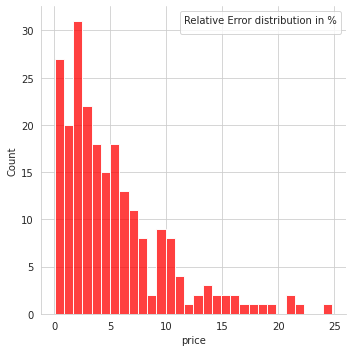

In [ ]:
sns.set_style('whitegrid')
sns.displot( abs(test_y-pred_test)/test_y*100, kde = False, color ='red', bins = 30)
plt.legend(title='Relative Error distribution in %')

Cross validation

In [ ]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = np.absolute(scores)
# MAE Computation
print("CV MAE : £" ,scores.mean(), scores.mean()/5.939672e+05*100," % --- std £",scores.std())

CV MAE : £ 30725.180339529343 5.172874922980485  % --- std £ 2859.1375824164033


CV MAE : £ 32019.637906345473 5.390809106352249  % --- std £ 3104.9615604033297

In [ ]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

# R2 Computation
print("CV R2 :" ,scores.mean(), " std:",scores.std())

CV R2 : 0.8800675864957023  std: 0.044040103082238366


### Plot feature importance


- The Gain implies the relative contribution of the corresponding feature to the model calculated by taking each feature’s contribution for each tree in the model. 
- The Coverage metric means the relative number of observations related to this feature.
- The Weight  is the percentage representing the relative number of times a particular feature occurs in the trees of the model
- ‘Gain’ is the improvement in accuracy brought by a feature to the branches it is on. 
- ‘Coverage’ measures the relative quantity of observations concerned by a feature.”


#### Ranking by gain (uses the loss)

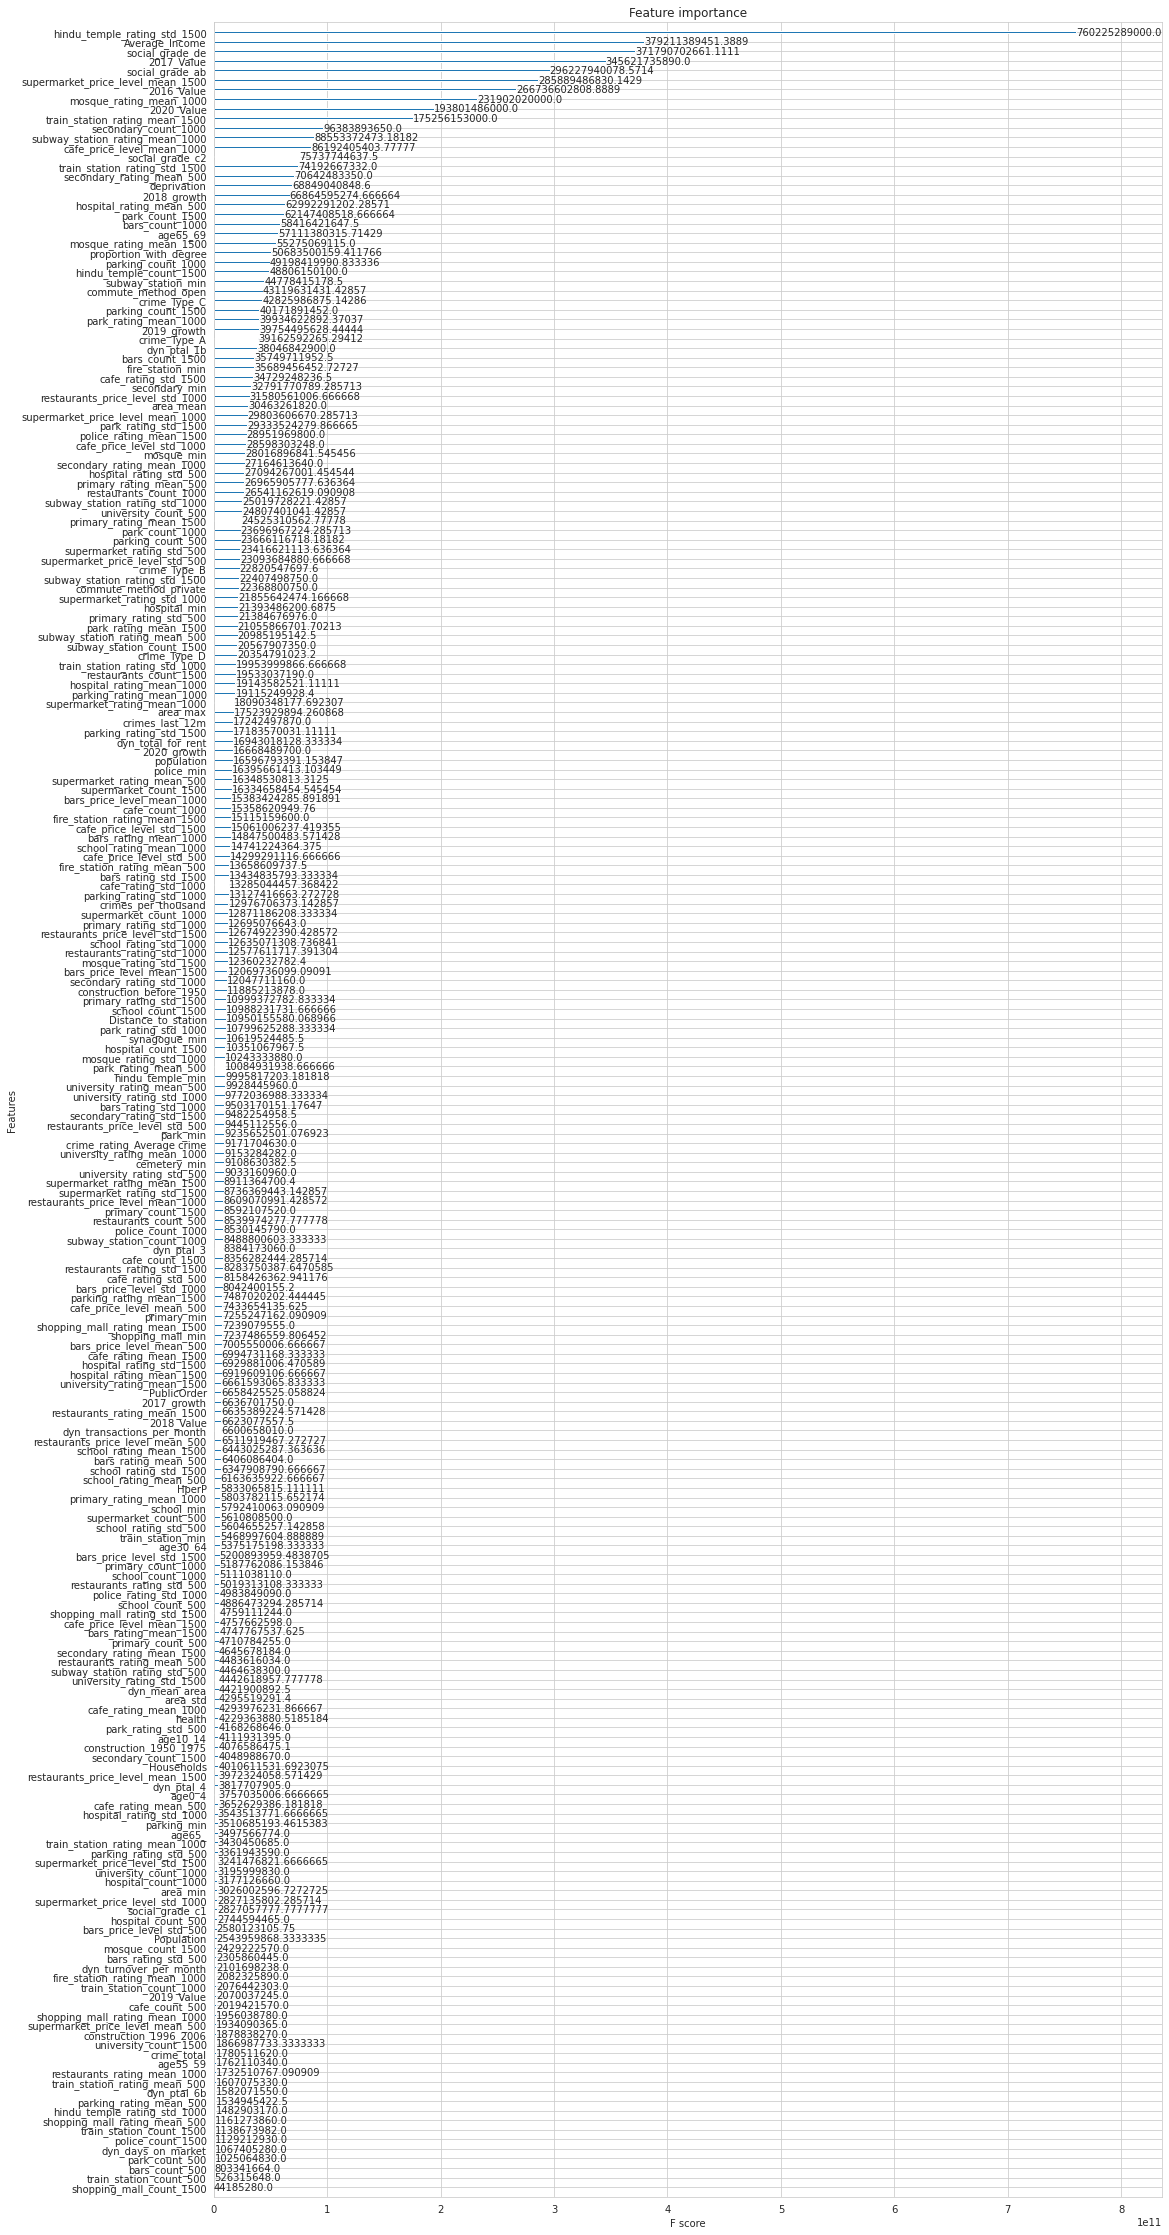

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(17,40))

xg.plot_importance(xgb_r, ax,importance_type='gain')

#### Ranking by cover

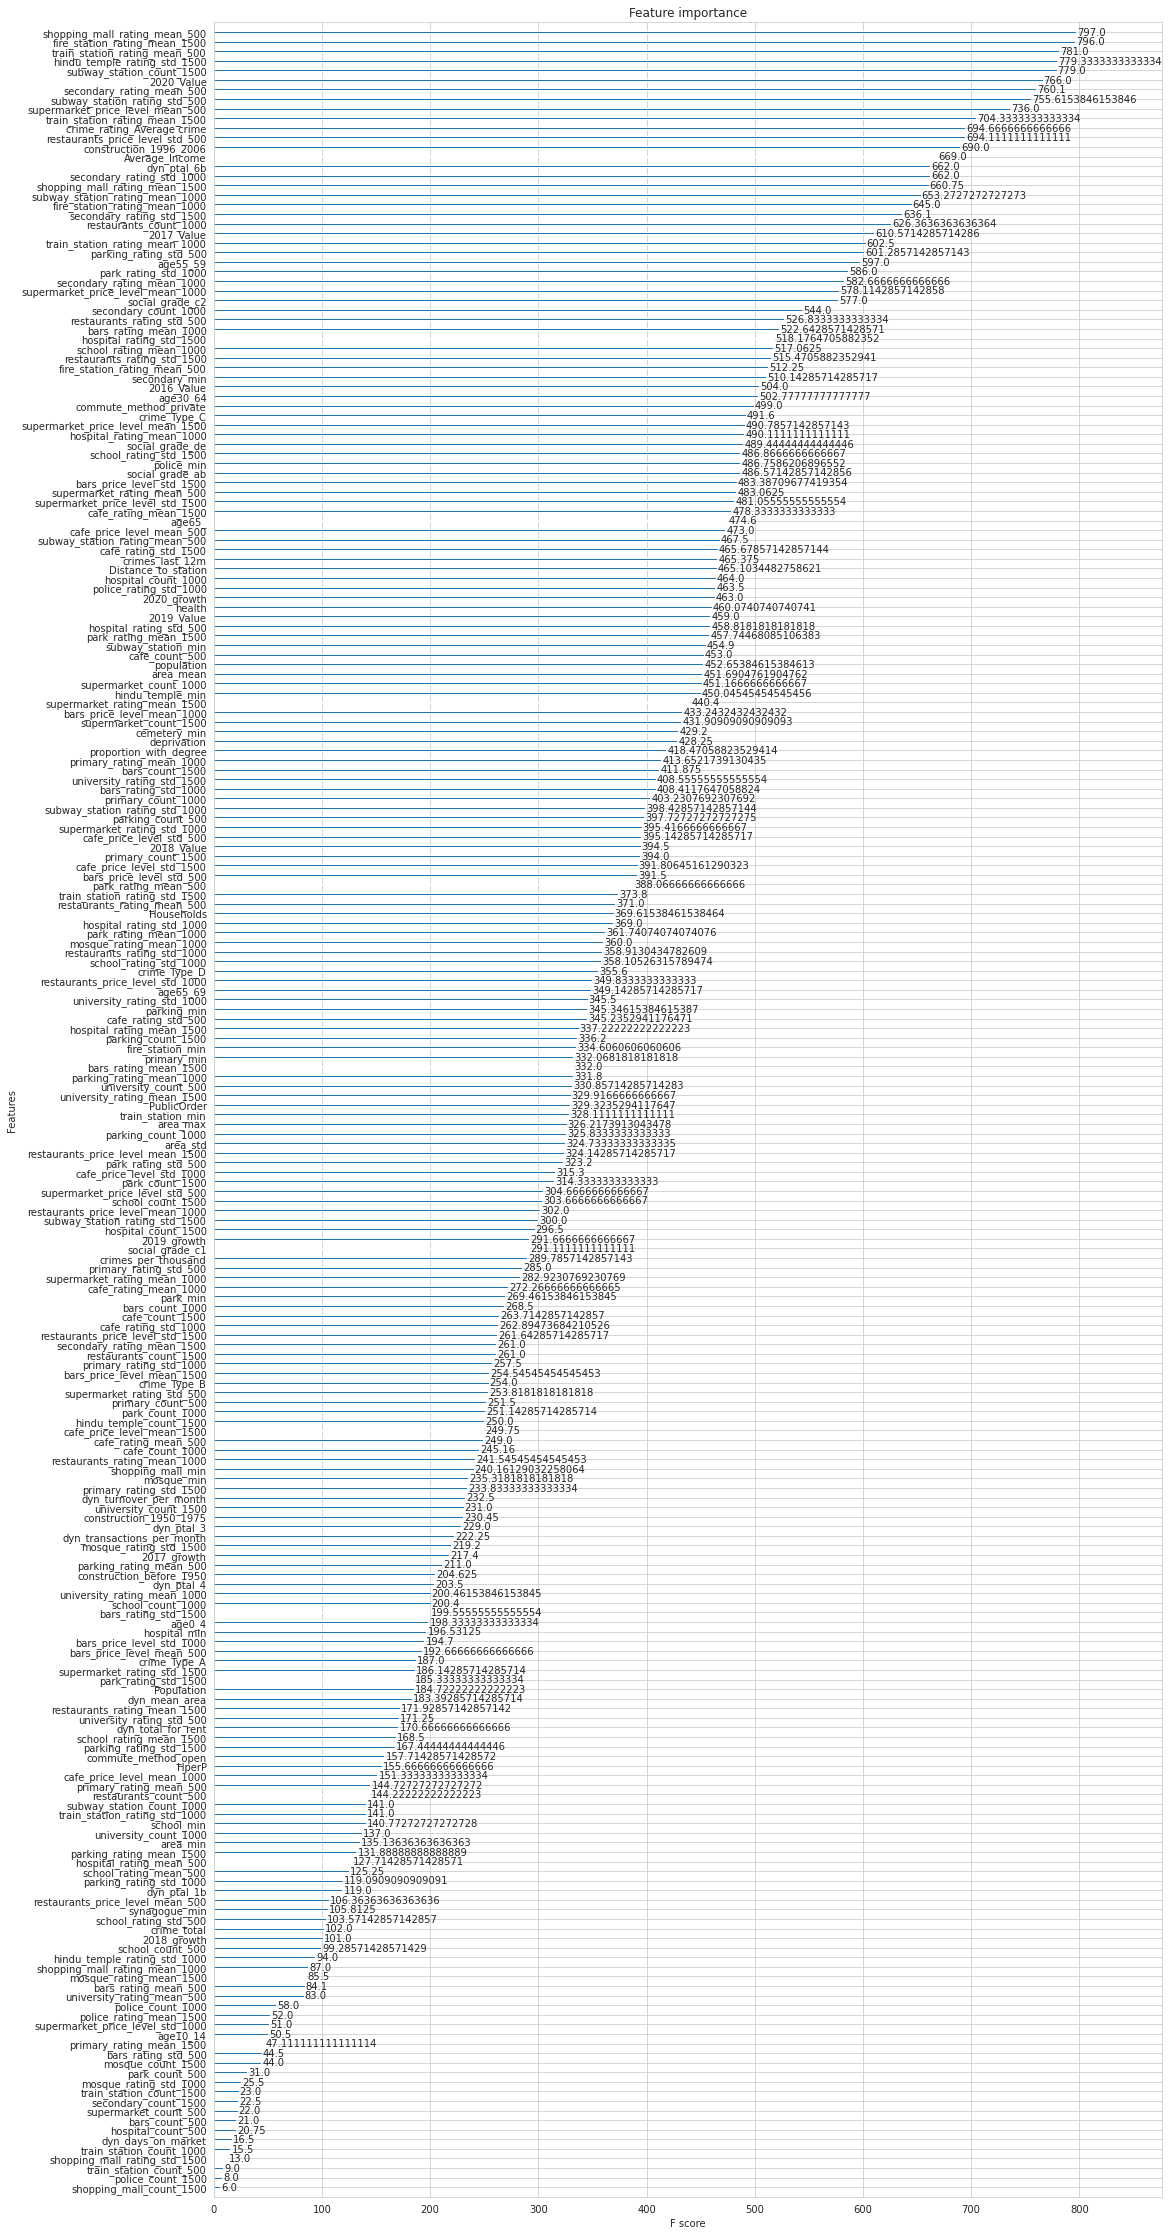

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(17,40))

xg.plot_importance(xgb_r, ax,importance_type='cover')

#### Ranking by total gain

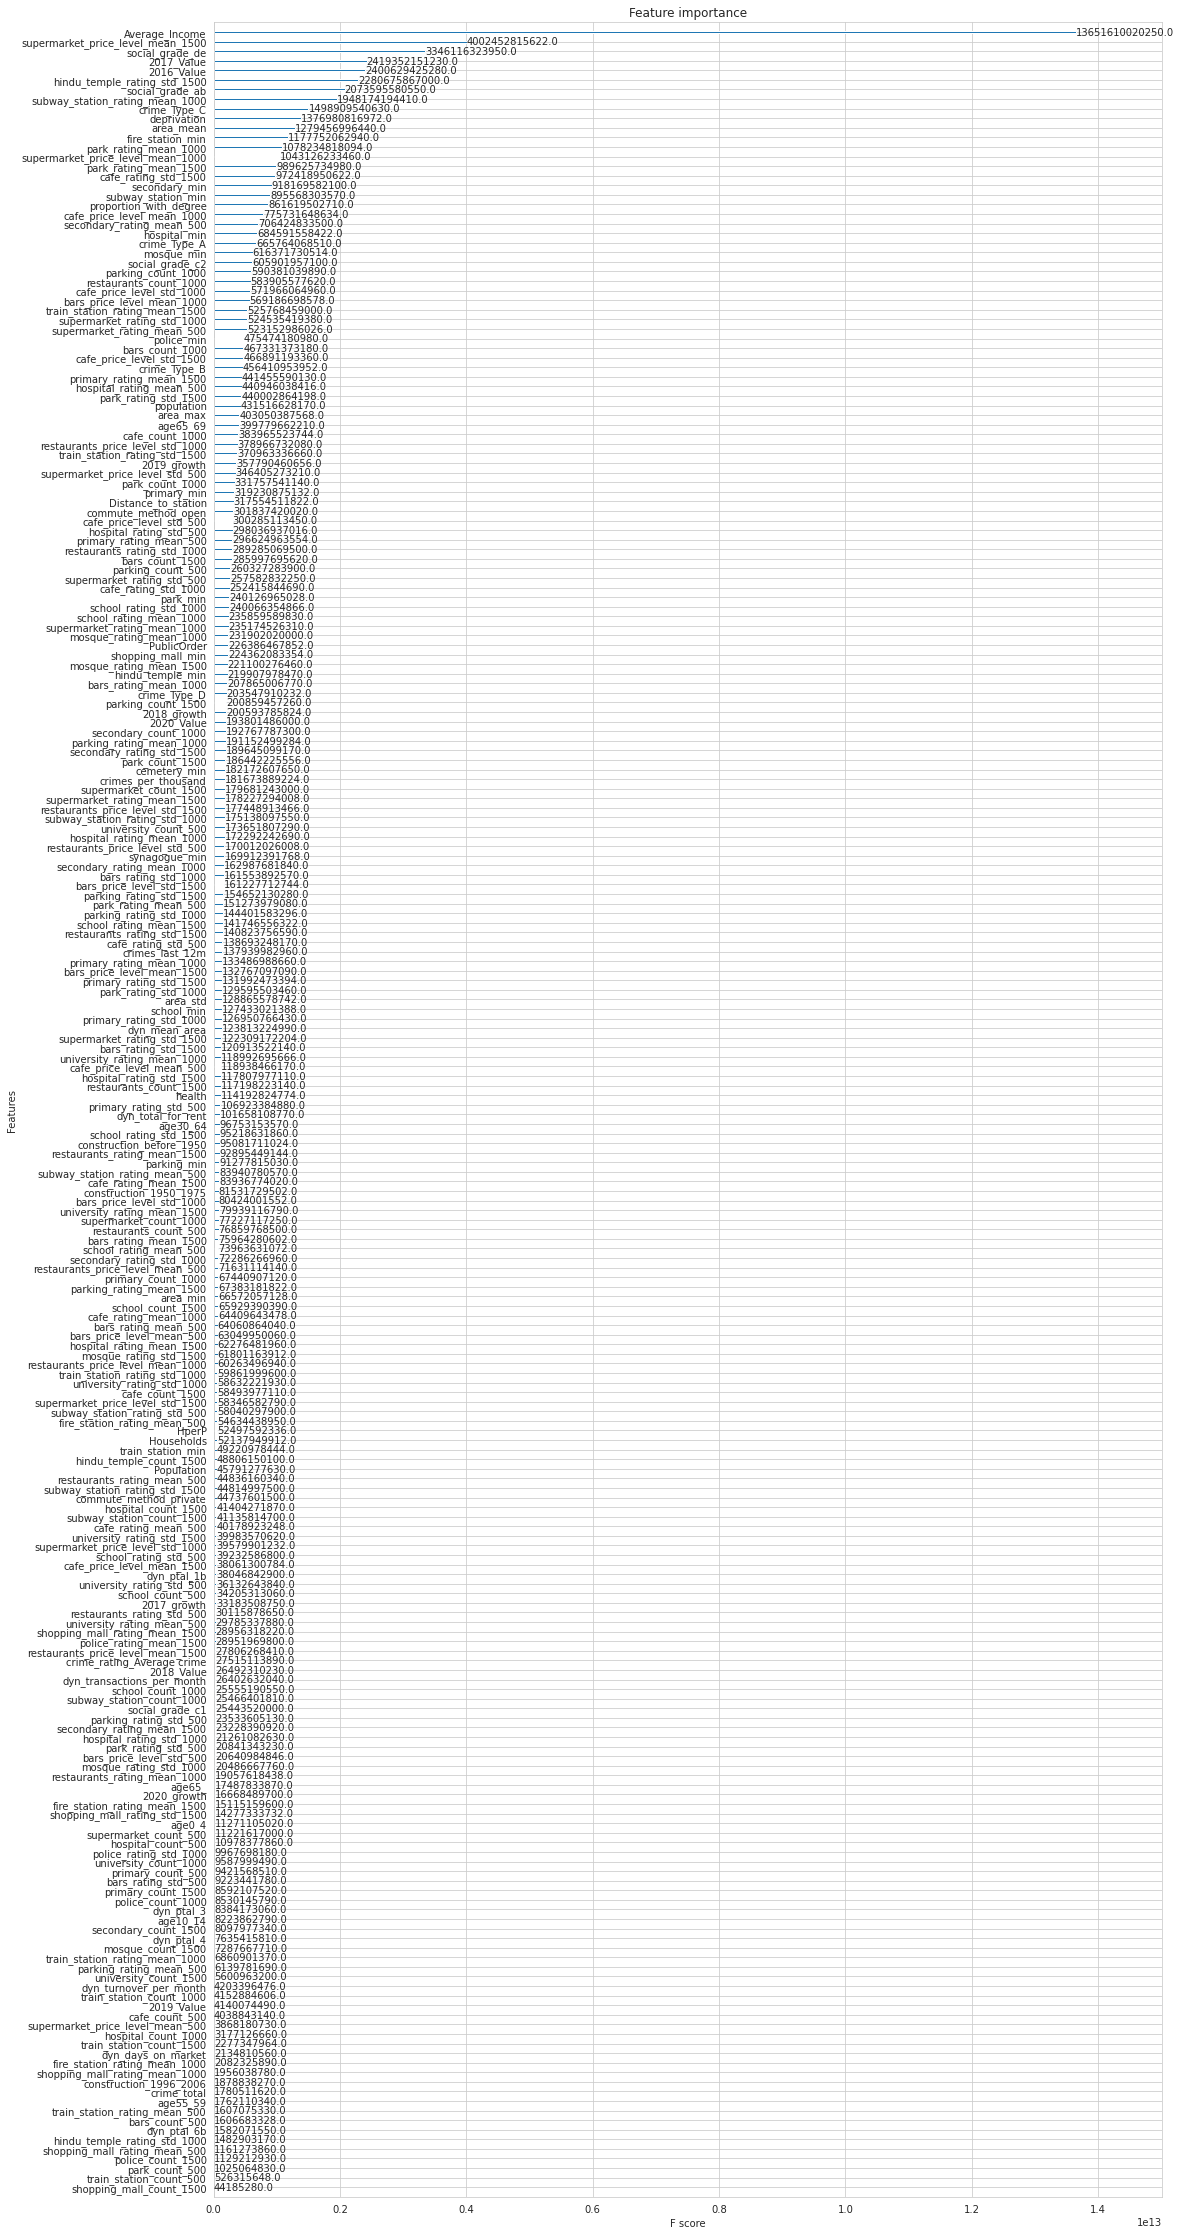

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(17,40))

xg.plot_importance(xgb_r, ax,importance_type='total_gain')

#### Ranking by total cover (uses the total loss)

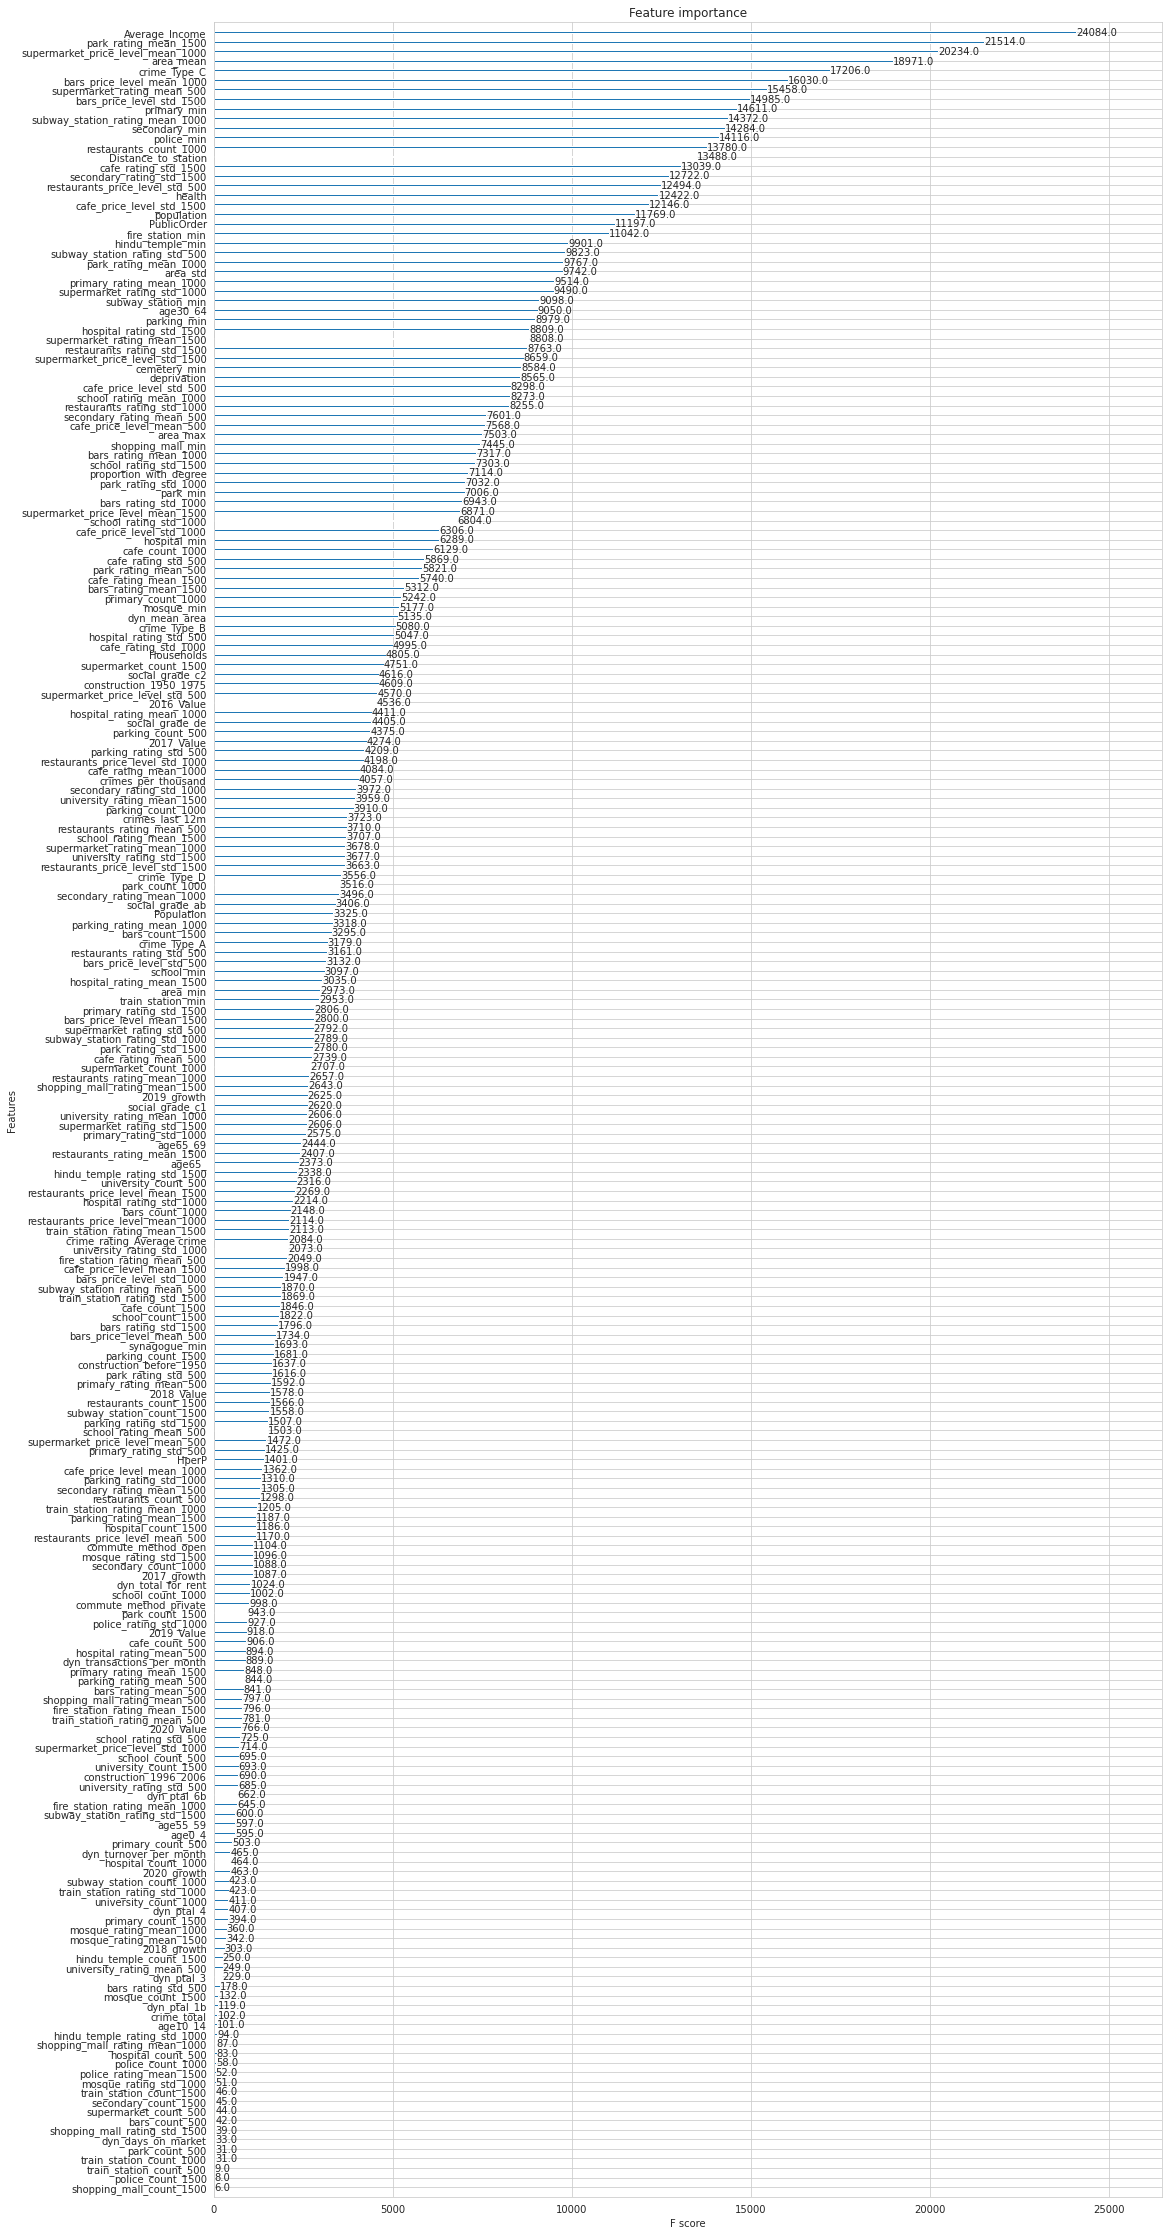

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(17,40))

xg.plot_importance(xgb_r, ax,importance_type='total_cover')

#### Ranking by weight

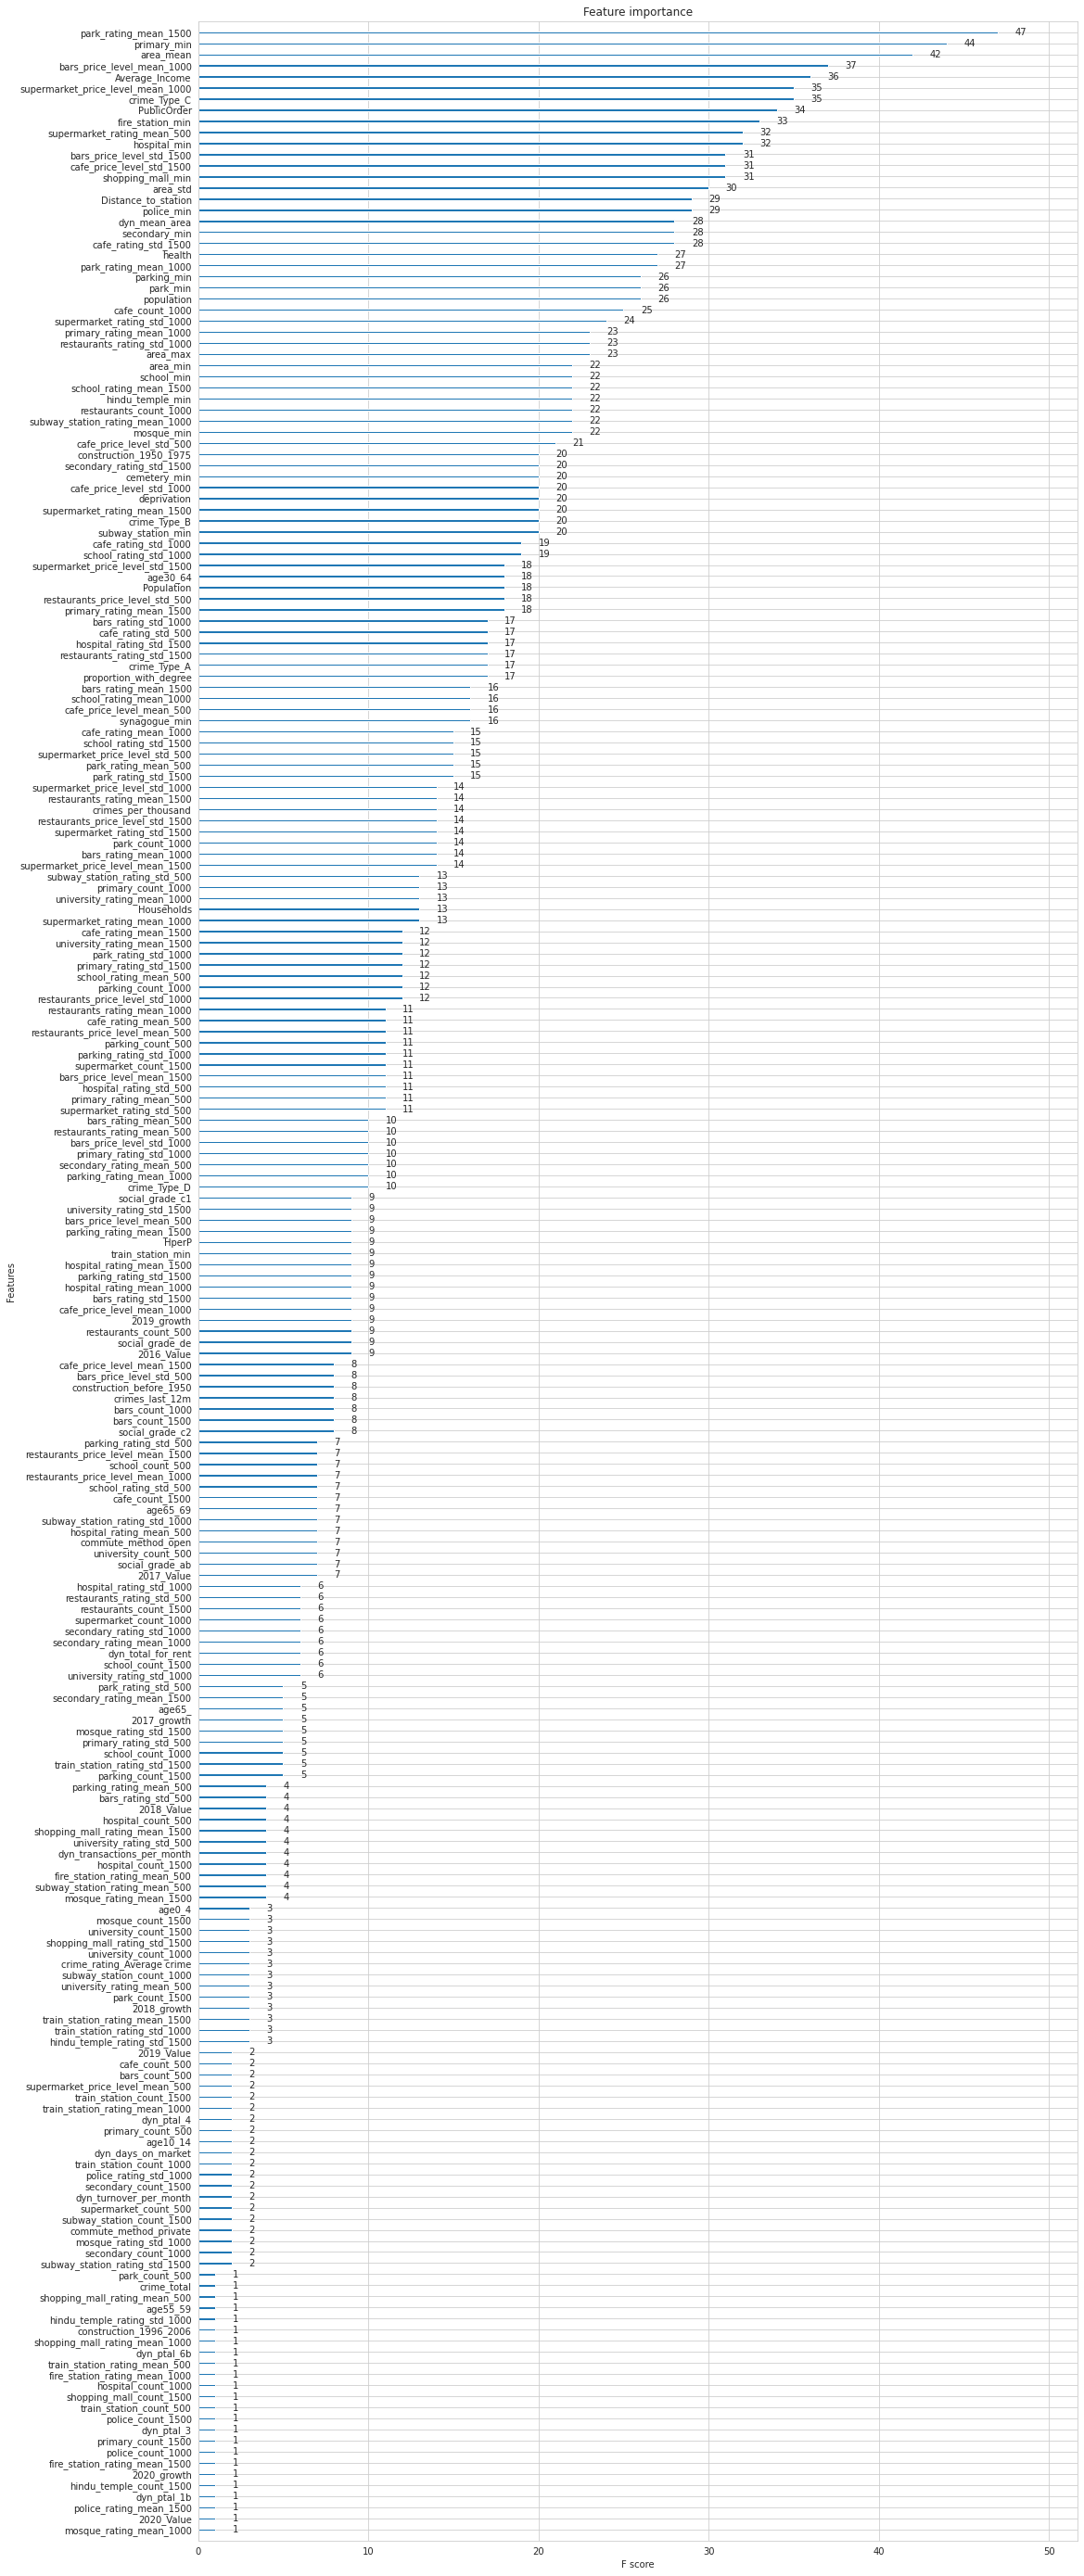

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(17,50))

xg.plot_importance(xgb_r, ax,importance_type='weight')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning:

The following kwargs were not used by contour: 'row'

No handles with labels found to put in legend.


Text(0.5, 32.99999999999995, 'real price')

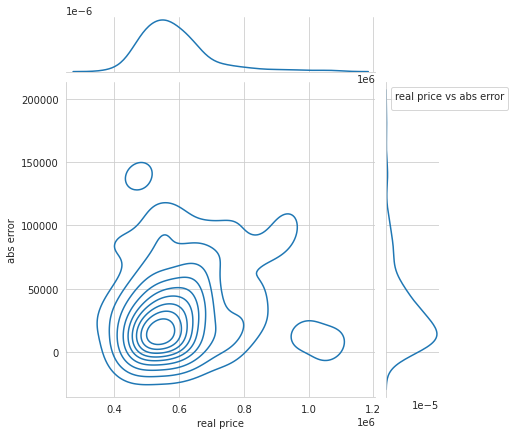

In [ ]:
h=sns.jointplot(x = test_y, y = np.abs(test_y-pred_test), kind ='kde', row="day")
plt.legend(title='real price vs abs error')
h.ax_joint.set_ylabel('abs error')
h.ax_joint.set_xlabel('real price')

No handles with labels found to put in legend.


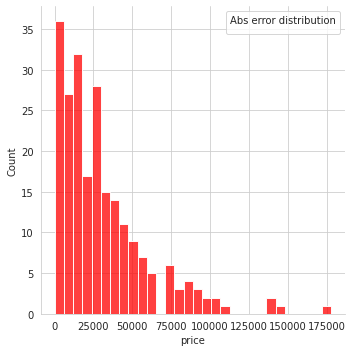

In [ ]:
sns.set_style('whitegrid')
h=sns.displot(np.abs(test_y-pred_test), kde = False, color ='red', bins = 30)
plt.legend(title='Abs error distribution')

### Explain predictions using shap

https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html

In [ ]:
explainer = shap.TreeExplainer(xgb_r)

shap_values = explainer.shap_values(train_X)

Visualize a single prediction

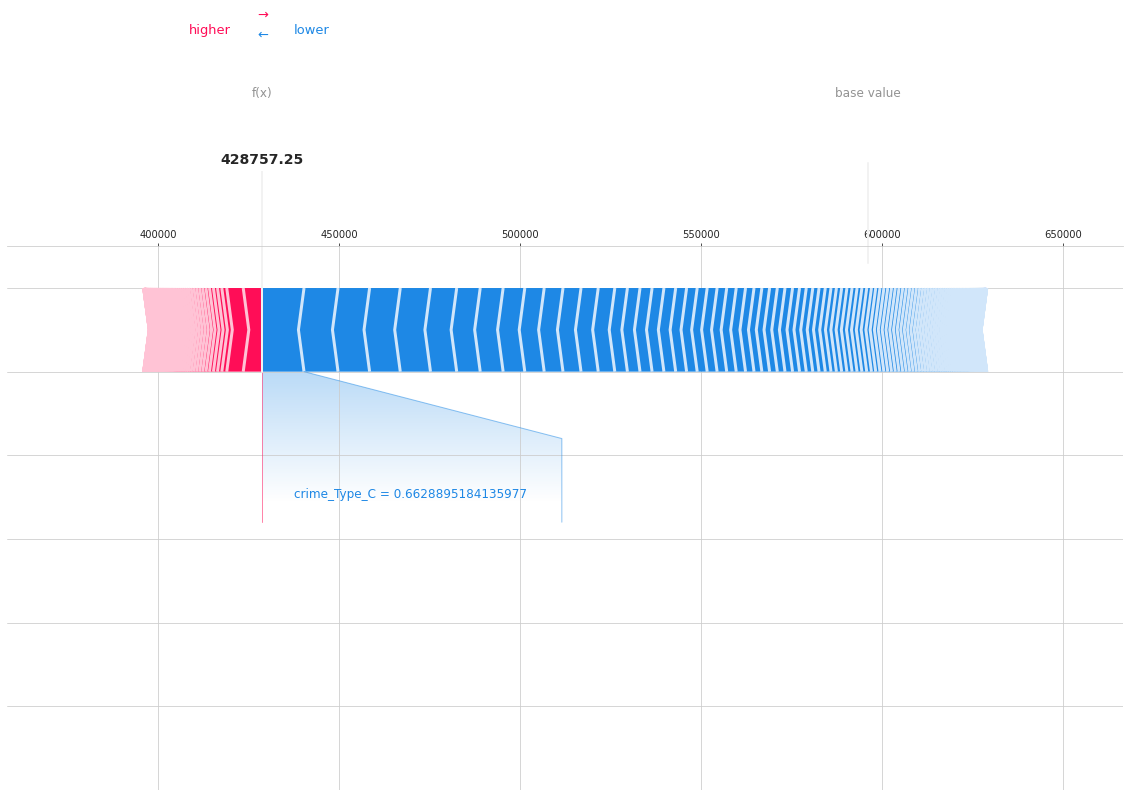

In [ ]:
g=shap.force_plot(explainer.expected_value, shap_values[1,:], train_X.iloc[1,:],show=False,matplotlib=True, figsize=(20, 10))

Bar chart of mean importance

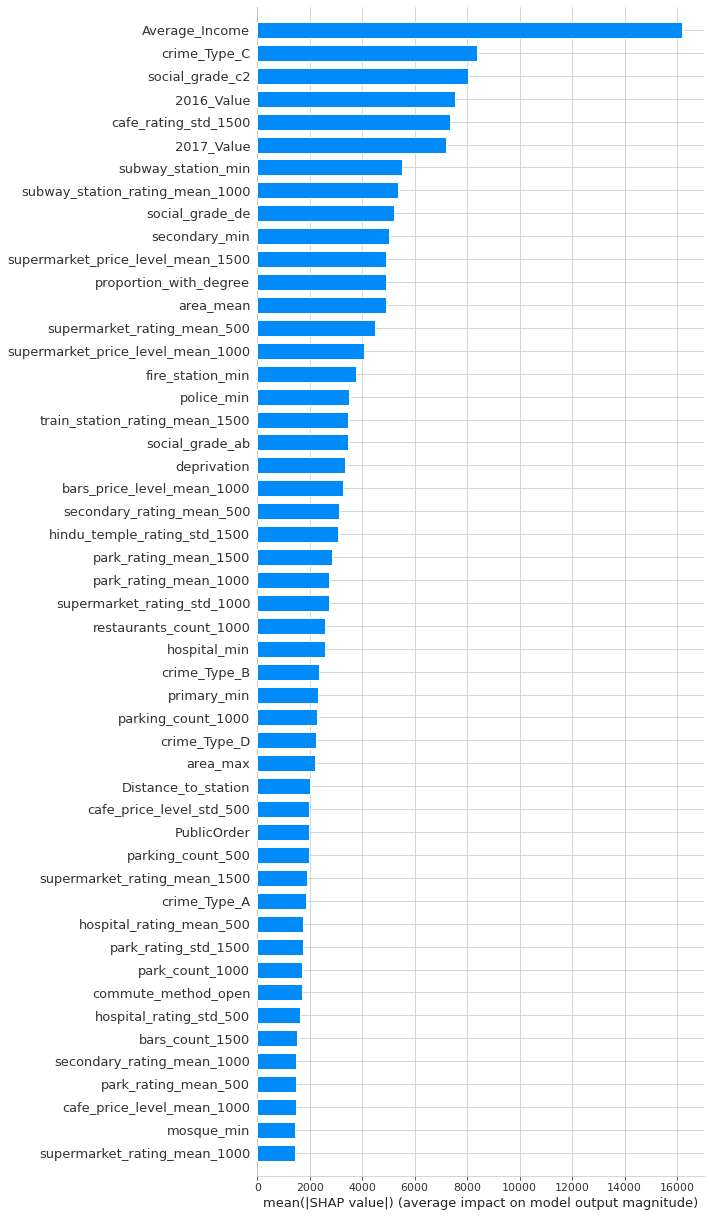

In [ ]:
shap.summary_plot(shap_values, train_X, plot_type="bar",max_display=50)

#### SHAP Summary Plot

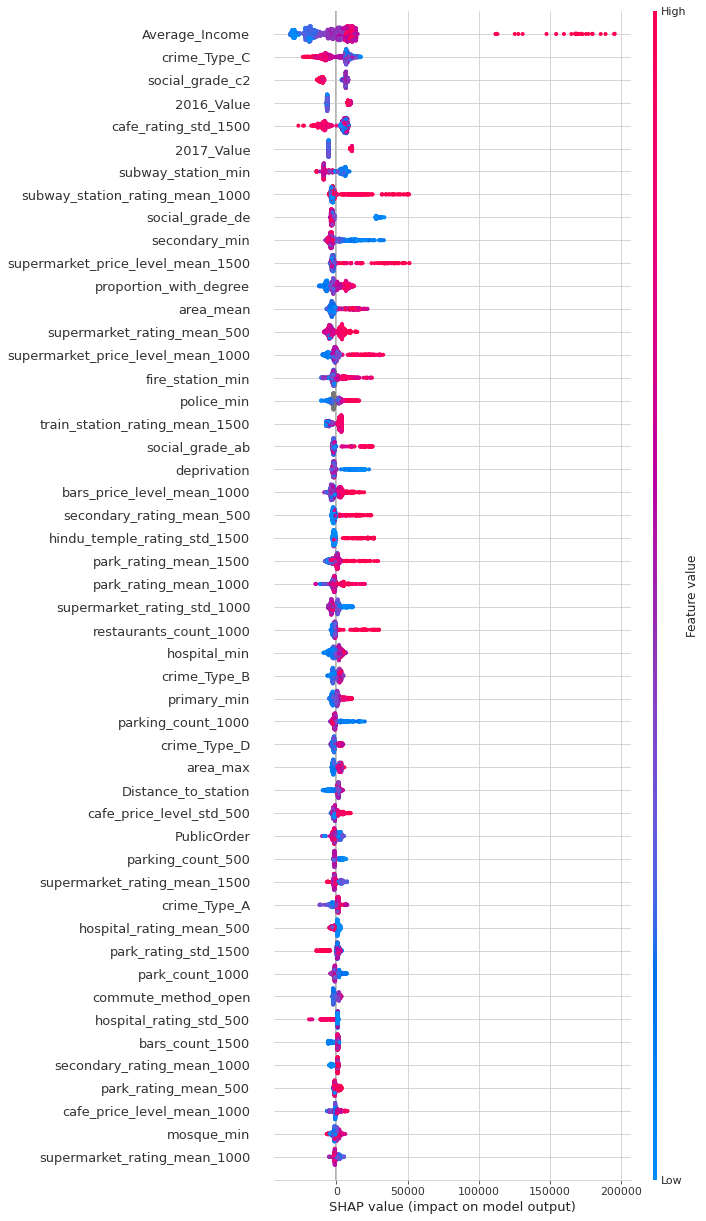

In [ ]:
shap.summary_plot(shap_values, train_X,max_display=50)